<a id='Tableofcontents'></a>
# Table of Contents:
<li><a href='#imports'>Imports</a></li>
<li><a href='#q1'>Question 1</a></li>
<li><a href='#q2'>Question 2</a></li>
<li><a href='#q3'>Question 3</a></li>
<li><a href='#q4'>Question 4</a></li>
<li><a href='#q5'>Question 5</a></li>

Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

<a id='imports'></a>
# Imports:
<li><a href='#Tableofcontents'>Table of Contents</a></li>

In [1]:
# Vectorization and tables
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Stats
from scipy import stats

# sklearn
import sklearn.preprocessing

# .py files
import wrangle

In [2]:
# Get zillow then split zillow
train, validate, test = wrangle.wrangle_zillow()

train.shape:(1069116, 12)
validate.shape:(458193, 12)
test.shape:(381828, 12)


In [3]:
# Verify shapes
train.shape, validate.shape, test.shape

((1069116, 12), (458193, 12), (381828, 12))

In [4]:
train

,bedroomcnt,bathroomcnt,sqrft,assessedvalue,yearbuilt,taxamount,county_Los Angeles,county_Orange,county_Ventura,propertylandusedesc_Inferred Single Family Residential,propertylandusedesc_Single Family Residential,state_California
1237441,4,3.0,3097.0,492326.0,1984,4929.86,0,1,0,0,1,1
1159376,2,1.0,692.0,239885.0,1956,2933.80,1,0,0,0,1,1
19016,3,2.0,1480.0,356860.0,1970,4394.00,0,1,0,0,1,1
1764228,3,2.0,1083.0,151373.0,1962,1955.76,0,1,0,0,1,1
2090759,3,1.0,983.0,124263.0,1954,2159.90,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1667154,3,1.0,774.0,177850.0,1948,2446.98,0,1,0,0,1,1
1325051,4,2.5,1970.0,554009.0,1984,6205.96,0,0,1,0,1,1
596283,2,2.0,992.0,33706.0,1924,588.93,1,0,0,0,1,1
688371,2,2.0,1350.0,407147.0,1977,4210.94,0,1,0,0,1,1


<a id='q1'></a>
# Question 1
<li><a href='#Tableofcontents'>Table of Contents</a></li>

### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [5]:
# Identify scaling columns
scale_cols = ['bedroomcnt',
              'bathroomcnt',
              'sqrft',
              'yearbuilt',
              'taxamount']

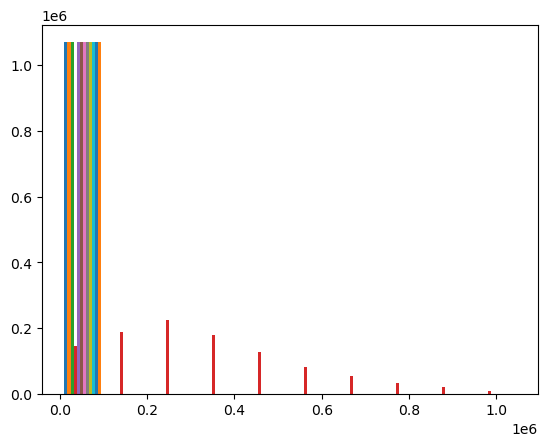

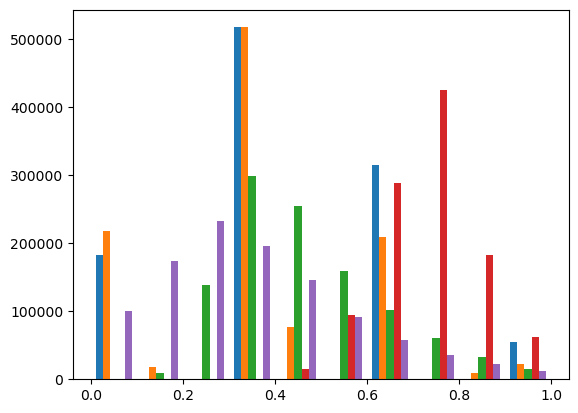

In [6]:
# Apply scaler to dfs (MinMaxScaler)
scaler_mms = sklearn.preprocessing.MinMaxScaler()
scaler_mms.fit(train[scale_cols])
scaled_mms_train = scaler_mms.transform(train[scale_cols])
plt.hist(train)
plt.show()
plt.hist(scaled_mms_train)
plt.show()

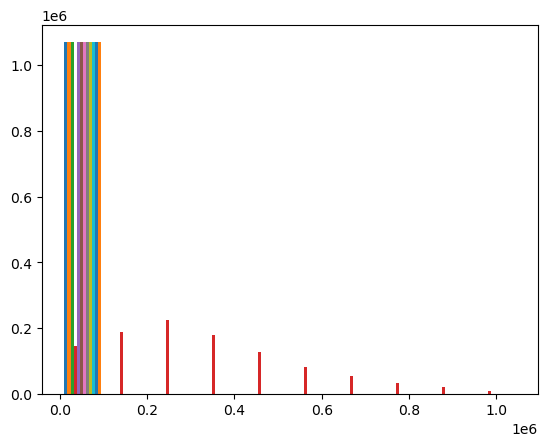

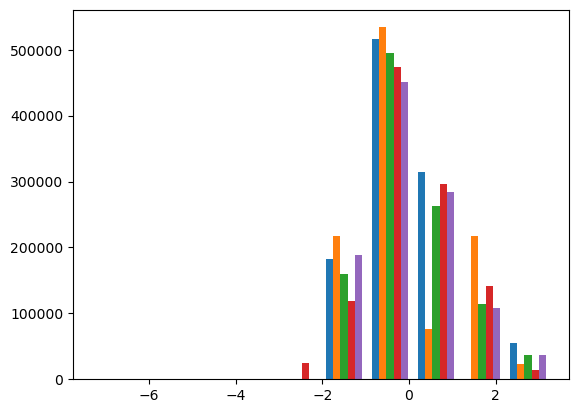

In [7]:
# Apply scaler to dfs (StandardScaler)
scaler_ss = sklearn.preprocessing.StandardScaler()
scaler_ss.fit(train[scale_cols])
scaled_ss_train = scaler_ss.transform(train[scale_cols])
plt.hist(train)
plt.show()
plt.hist(scaled_ss_train)
plt.show()

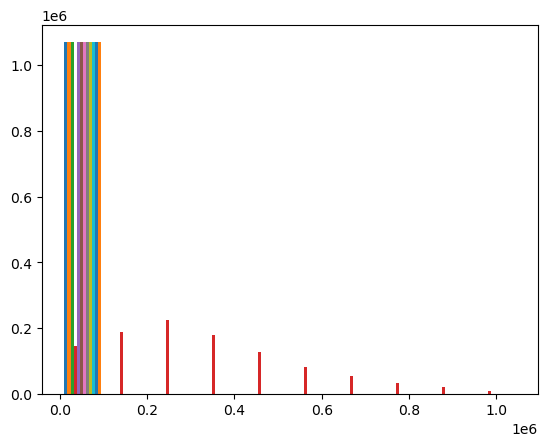

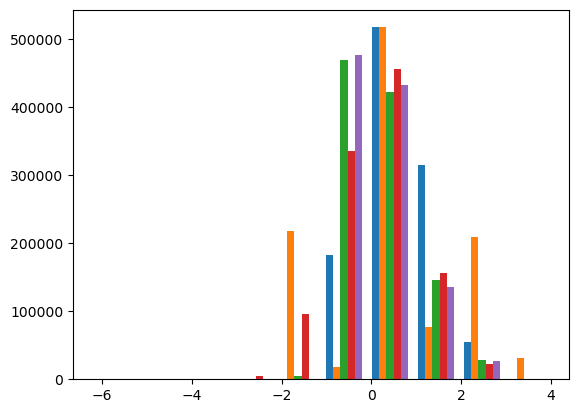

In [8]:
# Apply scaler to dfs (RobustScaler)
scaler_rs = sklearn.preprocessing.RobustScaler()
scaler_rs.fit(train[scale_cols])
scaled_rs_train = scaler_rs.transform(train[scale_cols])
plt.hist(train)
plt.show()
plt.hist(scaled_rs_train)
plt.show()

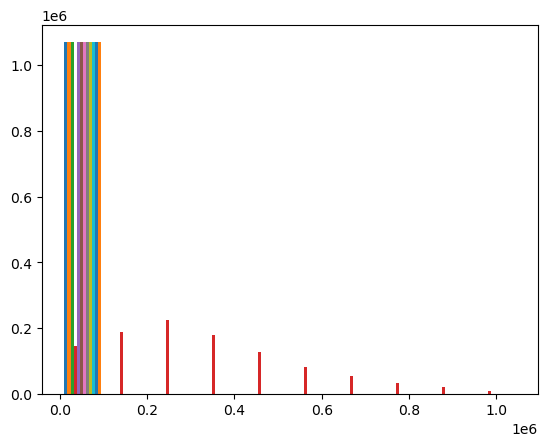

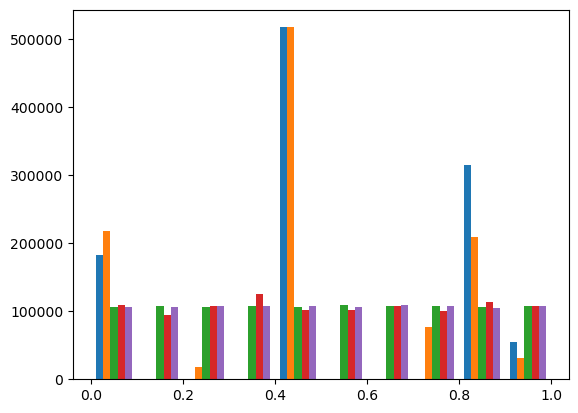

In [9]:
# Apply scaler to dfs (QuantileTransformer)
scaler_qt = sklearn.preprocessing.QuantileTransformer()
scaler_qt.fit(train[scale_cols])
scaled_qt_train = scaler_qt.transform(train[scale_cols])
plt.hist(train)
plt.show()
plt.hist(scaled_qt_train)
plt.show()

<a id='q2'></a>
# Question 2
<li><a href='#Tableofcontents'>Table of Contents</a></li>

### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

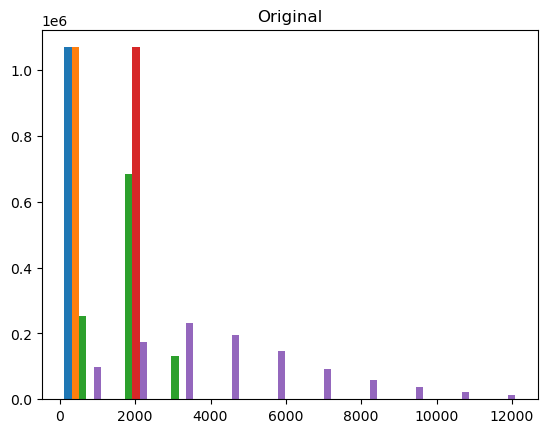

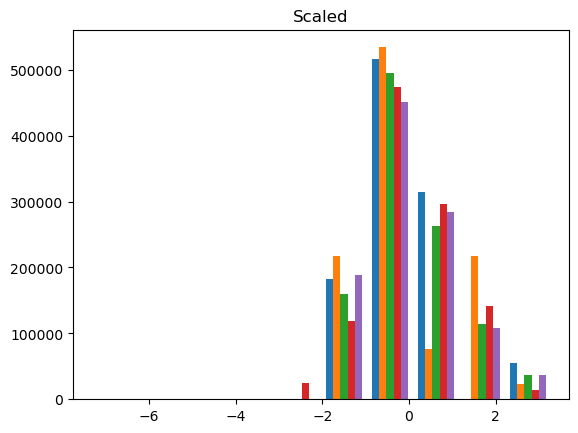

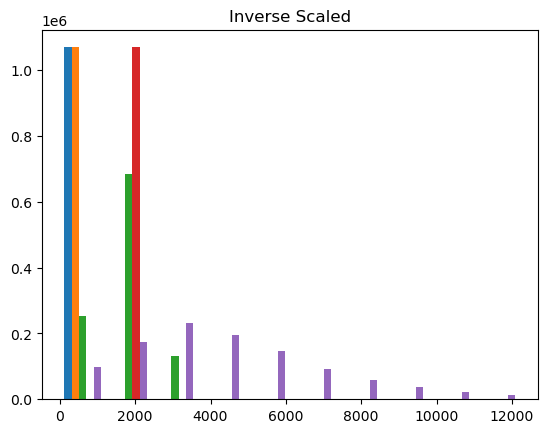

In [10]:
scaler_ss = sklearn.preprocessing.StandardScaler()
scaler_ss.fit(train[scale_cols])
scaled_data = scaler_ss.transform(train[scale_cols])
unscaled_data = scaler_ss.inverse_transform(scaled_data)

plt.hist(train[scale_cols])
plt.title('Original')
plt.show()

plt.hist(scaled_data)
plt.title('Scaled')
plt.show()

plt.hist(unscaled_data)
plt.title('Inverse Scaled')
plt.show()

<a id='q3'></a>
# Question 3
<li><a href='#Tableofcontents'>Table of Contents</a></li>

### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

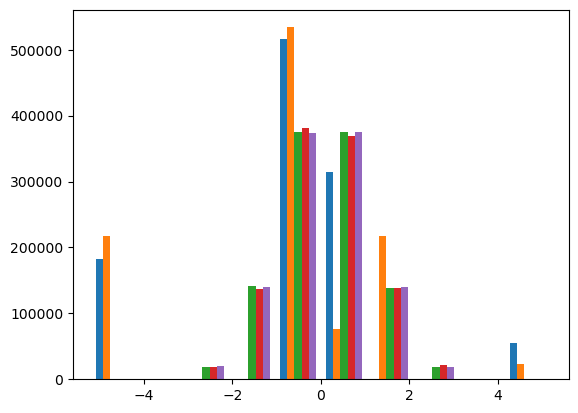

In [11]:
scaler_qt2 = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
scaler_qt2.fit(train[scale_cols])
plt.hist(scaler_qt2.transform(train[scale_cols]))
plt.show()

<a id='q4'></a>
# Question 4
<li><a href='#Tableofcontents'>Table of Contents</a></li>

### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

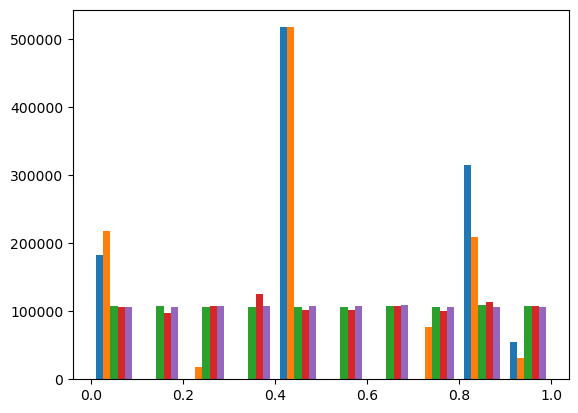

In [12]:
scaler_qt3 = sklearn.preprocessing.QuantileTransformer()
scaler_qt3.fit(train[scale_cols])
plt.hist(scaler_qt3.transform(train[scale_cols]))
plt.show()

DAS BARS ARE DIFFERENT JA

<a id='q5'></a>
# Question 5
<li><a href='#Tableofcontents'>Table of Contents</a></li>

### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

Use that standard scaler doh

In [24]:
train, validate, test = wrangle.wrangle_zillow()

train.shape:(1069116, 12)
validate.shape:(458193, 12)
test.shape:(381828, 12)


In [25]:
train_scaled, validate_scaled, test_scaled = wrangle.scale(train, validate, test)

In [27]:
train_scaled.sample()

,bedroomcnt,bathroomcnt,sqrft,assessedvalue,yearbuilt,taxamount,county_Los Angeles,county_Orange,county_Ventura,propertylandusedesc_Inferred Single Family Residential,propertylandusedesc_Single Family Residential,state_California
765696,-0.287352,-1.490671,-1.151295,263196.0,-0.564358,-0.398474,1,0,0,0,1,1


In [17]:
validate_scaled.sample()

,bedroomcnt,bathroomcnt,sqrft,assessedvalue,yearbuilt,taxamount,county_Los Angeles,county_Orange,county_Ventura,propertylandusedesc_Inferred Single Family Residential,propertylandusedesc_Single Family Residential,state_California
2124314,-1.5593,-1.489504,-0.809205,440000.0,-0.947512,0.451765,1,0,0,0,1,1


In [19]:
test_scaled.sample()

,bedroomcnt,bathroomcnt,sqrft,assessedvalue,yearbuilt,taxamount,county_Los Angeles,county_Orange,county_Ventura,propertylandusedesc_Inferred Single Family Residential,propertylandusedesc_Single Family Residential,state_California
579545,-0.286016,-0.101289,-0.139639,107501.0,0.108917,-1.127613,0,1,0,0,1,1


In [41]:
train, validate, test = wrangle.wrangle_zillow()

train.shape:(1069116, 12)
validate.shape:(458193, 12)
test.shape:(381828, 12)


In [42]:
train_scaled = train

In [43]:
train_scaled.sample()

,bedroomcnt,bathroomcnt,sqrft,assessedvalue,yearbuilt,taxamount,county_Los Angeles,county_Orange,county_Ventura,propertylandusedesc_Inferred Single Family Residential,propertylandusedesc_Single Family Residential,state_California
129859,4,3.0,2474.0,734192.0,1998,8331.1,0,0,1,0,1,1


In [45]:
train.shape

(1069116, 12)

In [46]:
def make_and_vis(scaler, X, scale_cols):
    train_scaled = train.copy()
    train_scaled[scale_cols] = scaler.fit_transform(train_scaled[scale_cols])
    fig, axs = plt.subplots(len(scale_cols), 2, figsize=(16, 9))
    for (ax1, ax2), col in zip(axs, scale_cols):
        ax1.hist(train[col])
        ax1.set(title=f'Distribution of Unscaled {col}',
                xlabel=f'Value of {col}',
                ylabel=f'Count of {col}')
        ax2.hist(train_scaled[col])
        ax2.set(title=f'Distribution of Unscaled {col}',
                xlabel=f'Value of {col}',
                ylabel=f'Count of {col}')
    plt.tight_layout()
    plt.show()

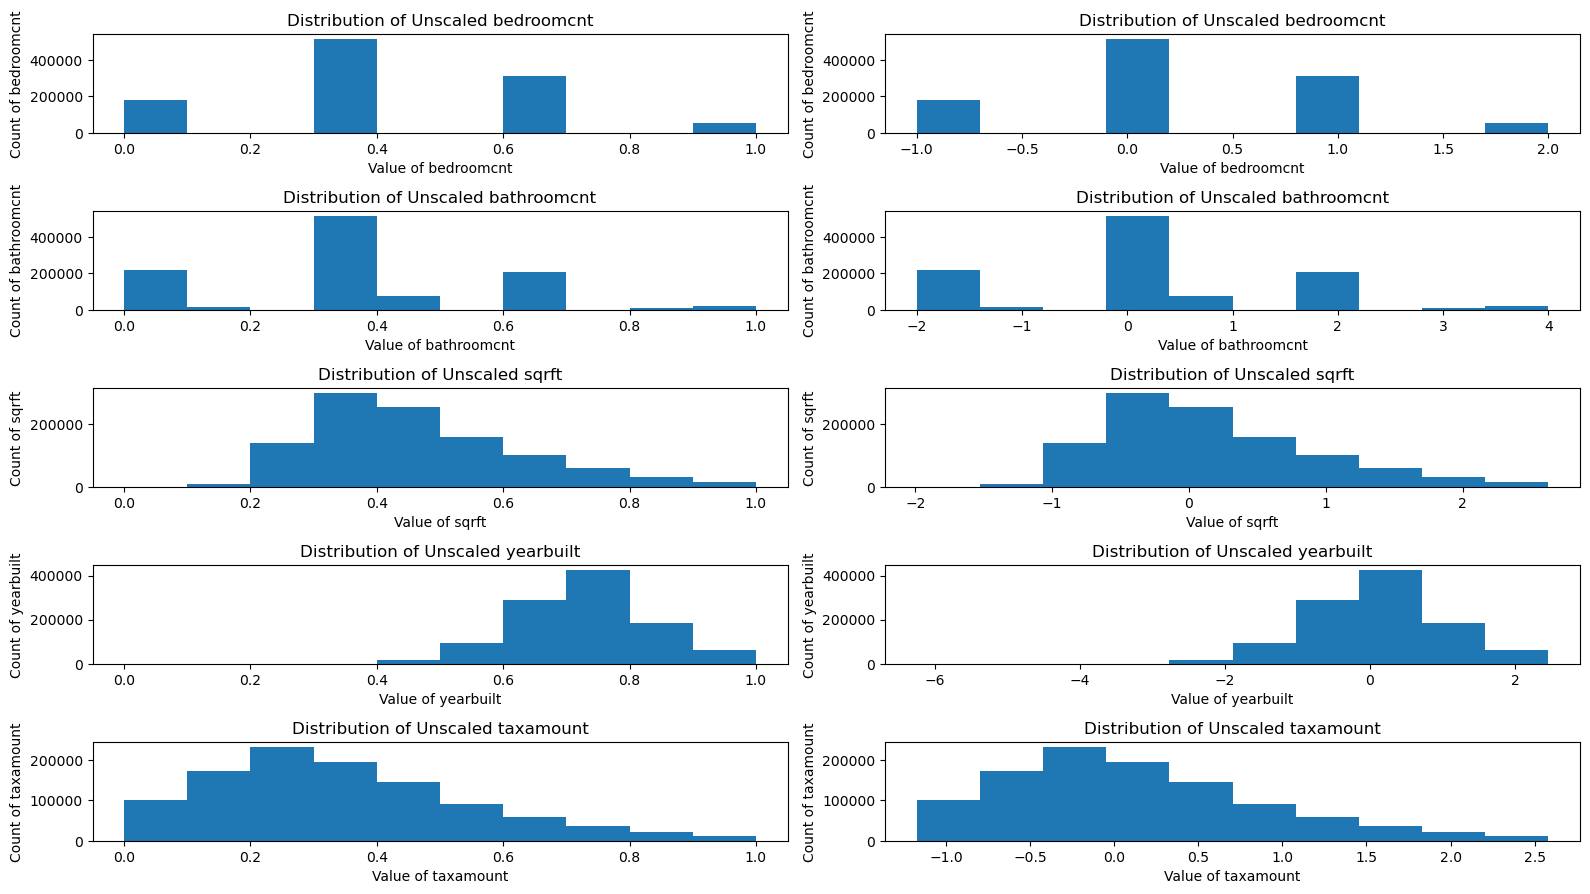

In [47]:
make_and_vis(sklearn.preprocessing.RobustScaler(), train, scale_cols)